![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df = pd.read_csv("https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv", encoding = "latin1")


In [4]:
# Print out First 5 rows from dataframe
# Your code here
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Print out brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [7]:
# Your code here
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [8]:
# List all NaN values of Description
df[df["Description"].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


**Exclude negative Quatity entries**

In [10]:
df = df[df["Quantity"] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531285 non-null object
StockCode      531285 non-null object
Description    530693 non-null object
Quantity       531285 non-null int64
InvoiceDate    531285 non-null object
UnitPrice      531285 non-null float64
CustomerID     397924 non-null float64
Country        531285 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


**Exclude negative Price entries**

In [11]:
df = df[df["UnitPrice"] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531283 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      531283 non-null object
StockCode      531283 non-null object
Description    530691 non-null object
Quantity       531283 non-null int64
InvoiceDate    531283 non-null object
UnitPrice      531283 non-null float64
CustomerID     397924 non-null float64
Country        531283 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [14]:
# Your code here
# Filter orders come from the UK, then count base on CustomerID
df[df["Country"]=="United Kingdom"]["CustomerID"].value_counts().head(1)

17841.0    7847
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [19]:
# Your code here
# Make an TotalPay column equal to Quantity*UnitPrice
df["TotalPay"] = df.apply(lambda row: row.Quantity*row.UnitPrice, axis = 1)
# Filter orders come from NetherLands, then groupby CustomerID to find the largest TotalPay of all
df[df["Country"]=="Netherlands"].groupby("CustomerID").sum().nlargest(1, "TotalPay")["TotalPay"]

CustomerID
14646.0    280206.02
Name: TotalPay, dtype: float64

**On which year had the highest sales?**

In [0]:
# Your code here
# Make "Year" column
#df["InvoiceDate"][0].split('/')[2].split(' ')[0]
df["Year"] = df.apply(lambda row: 2000 + int(row["InvoiceDate"].split('/')[2].split(' ')[0]), axis = 1)

In [65]:
# Take the maximum value of "TotalPay"
df.groupby("Year").sum().nlargest(1, "TotalPay")["TotalPay"]

Year
2011    9.842938e+06
Name: TotalPay, dtype: float64

**How many orders (per hour)?**

In [0]:
# Make "Hour" column
df["Hour"] = df.apply(lambda row: int(row["InvoiceDate"].split(':')[0].split(' ')[-1]), axis = 1)

In [61]:
# Count groupby Hour
df.groupby("Hour").count().InvoiceNo

Hour
6         1
7       379
8      8805
9     33755
10    47895
11    56312
12    77230
13    71075
14    66266
15    76432
16    53451
17    27635
18     7729
19     3516
20      802
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per hour**

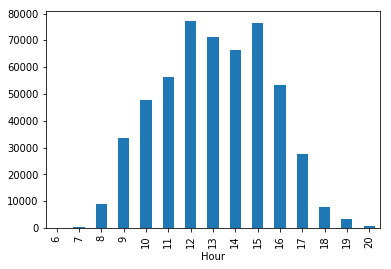

In [63]:
df.groupby("Hour").count().InvoiceNo.plot(kind='bar')

**How many orders (per month)?**

In [0]:
# Make "Month" Column
df["Month"] = df.apply(lambda row: int(row["InvoiceDate"].split('/')[0]), axis = 1)

In [70]:
df.groupby("Month").count().InvoiceNo

Month
1     34350
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34564
9     49323
10    59396
11    83498
12    66818
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per month**

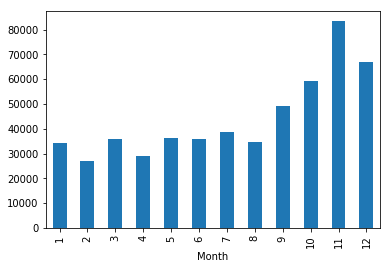

In [68]:
df.groupby("Month").count().InvoiceNo.plot(kind='bar')

**Top 10 items most sales**

In [74]:
df.groupby("StockCode").count().InvoiceNo.nlargest(10)

StockCode
85123A    2270
85099B    2115
22423     2019
47566     1707
20725     1595
84879     1489
22197     1426
22720     1401
21212     1370
20727     1328
Name: InvoiceNo, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [84]:
# Your code here

# What can you tell about this?

# Filter United Kingdom, then groupby Country
df[df["Country"] != "United Kingdom"].groupby("Country").sum().nlargest(10, "Quantity")["Quantity"]

Country
Netherlands    200937
EIRE           147447
Germany        119263
France         112104
Australia       84209
Sweden          36083
Switzerland     30630
Spain           27951
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64

There are 5 countrys which have total number of Quantity are from 23237 to 41007....

(array([5., 0., 0., 1., 0., 2., 1., 0., 0., 1.]),
 array([ 23237.,  41007.,  58777.,  76547.,  94317., 112087., 129857.,
        147627., 165397., 183167., 200937.]),
 <a list of 10 Patch objects>)

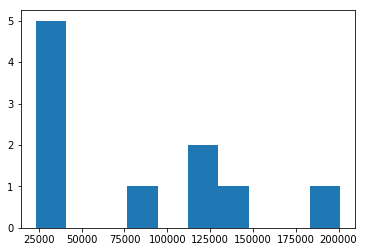

In [95]:
plt.hist(df[df["Country"] != "United Kingdom"].groupby("Country").sum().nlargest(10, "Quantity")["Quantity"], bins = 10)

### You are awesome!!